In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('data', kind='train')
X_test, y_test = load_mnist('data', kind='t10k')

In [4]:
labels_map  = pd.read_csv('data/labels_map.csv', index_col='Label')

In [5]:
labels_map

,Description
Label,
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag


##Randomforest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [7]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [8]:
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_pred)))

cm=metrics.confusion_matrix(y_test,y_pred)

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.82      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.73      0.59      0.65      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.97      0.96      100

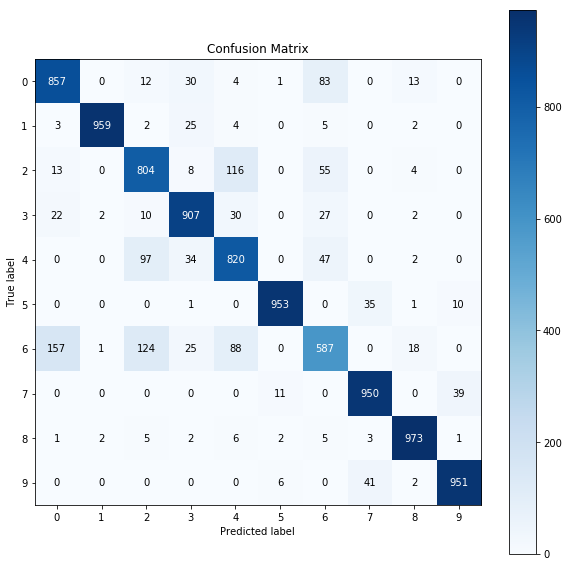

In [9]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred,figsize = (10,10))

ROC AUC

In [10]:
predicted_probas = model.predict_proba(X_test)

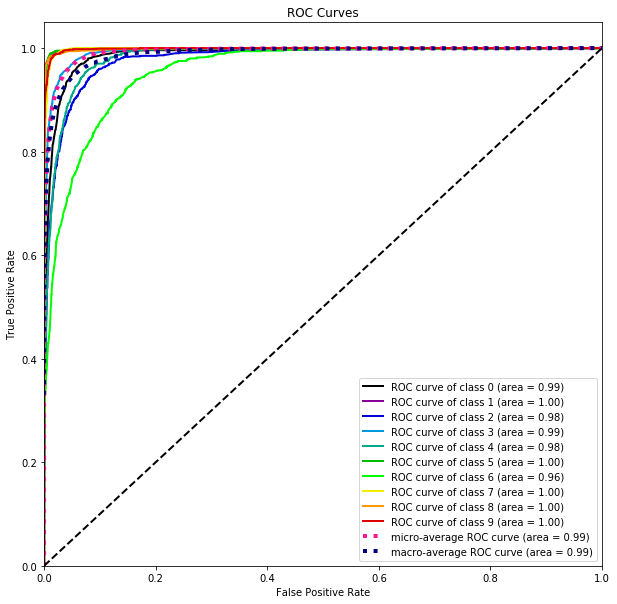

In [11]:
skplt.metrics.plot_roc(y_test, predicted_probas,figsize = (10,10))
plt.show()

Precision/recall

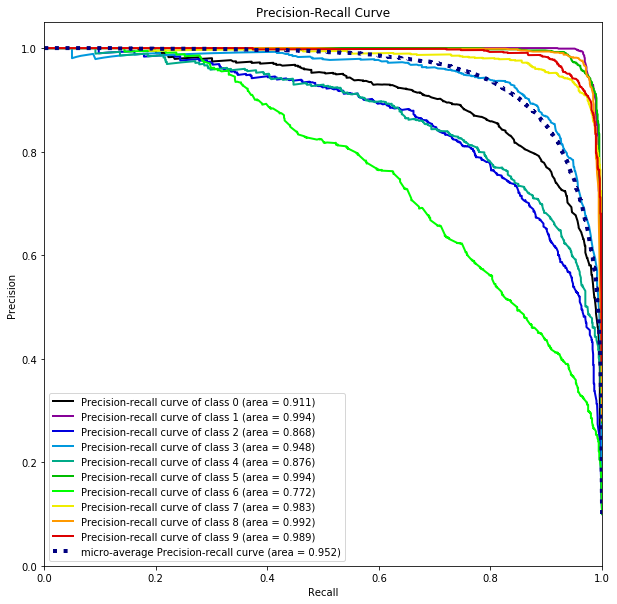

In [12]:
skplt.metrics.plot_precision_recall(y_test, predicted_probas, figsize = (10,10))

Эффективность случайного леса в классификации изображений оказалась довольно высока, самым проблемным классом оказались рубашки, F-мера, которых равна 0.65. Объекты этого класса часто путали с футболками, пуловерами и пальто

Class: 6 - Shirt


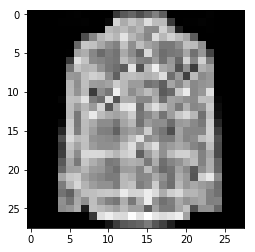

In [13]:
pic_id = 32
some_pic = X_train[pic_id]
pic_label = y_train[pic_id]

print('Class:', pic_label, '-', labels_map.loc[pic_label, 'Description'])

plt.imshow(some_pic.reshape((28, 28)), cmap='gray')
plt.show()

Построим нейрнную сеть

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

C:\Users\marte\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\marte\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\marte\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\marte\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [7]:
train_set = np.zeros((len(X_train), 28, 28), dtype=float)
for i in range(len(X_train)):
    train_set[i] = X_train[i].reshape((28,28))
    
#Приводим данные к виду 28-28

In [8]:
test_set = np.zeros((len(X_test), 28, 28), dtype=float)
for i in range(len(X_test)):
    test_set[i] = X_test[i].reshape((28,28))

In [9]:
train_set = train_set / 255.0
test_set = test_set / 255.0

#Нормализуем по максимуму

In [18]:
train_set.shape

(60000, 28, 28)

In [19]:
model_2lay = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_2lay.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2lay.fit(train_set, y_train, epochs = 100)

#Нейронная сеть с 2 полносвязными скрытыми слоями, функции активаций которых relu

Epoch 1/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.5894 - acc: 0.7891
Epoch 2/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.4394 - acc: 0.8428
Epoch 3/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.4070 - acc: 0.8537
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.3866 - acc: 0.8590
Epoch 5/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.3730 - acc: 0.8644
Epoch 6/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.3603 - acc: 0.8683
Epoch 7/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.3497 - acc: 0.8722
Epoch 8/100
60000/60000 [==============================] - 4s 58us/step - loss: 0.3414 - acc: 0.8748
Epoch 9/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.3360 - acc: 0.8773
Epoch 10/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.3283 - a

In [20]:
test_loss, test_acc = model_2lay.evaluate(test_set, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

#Точность на тестовых данных

10000/10000 [==============================] - 0s 33us/step
Test accuracy: 0.8636 
Test loss: 0.4602044004559517


Точность получилась неплохой, но при этом заметно ниже, чем на тренировочной выборке. Посмотрим на метрики более подробно.

In [22]:
print("Classification report for classifier %s:\n%s\n"
      % (model_2lay, metrics.classification_report(y_test, model_2lay.predict_classes(test_set))))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000203393EC978>:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.79      0.75      0.77      1000
           3       0.86      0.86      0.86      1000
           4       0.74      0.81      0.78      1000
           5       0.96      0.93      0.94      1000
           6       0.66      0.67      0.67      1000
           7       0.92      0.96      0.94      1000
           8       0.96      0.95      0.96      1000
           9       0.95      0.95      0.95      1000

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000




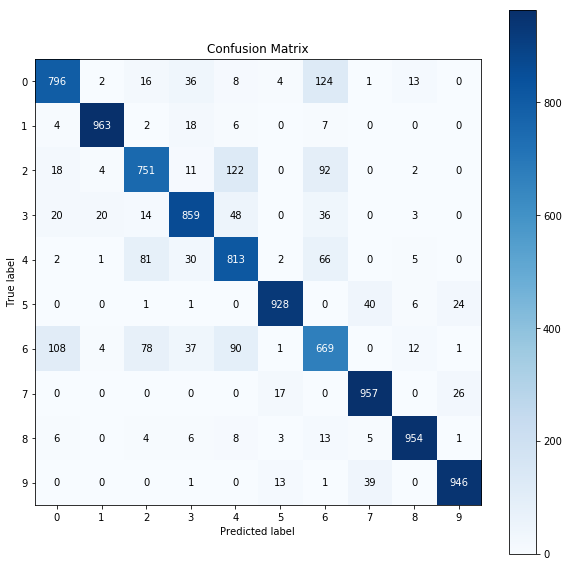

In [23]:
skplt.metrics.plot_confusion_matrix(y_test, model_2lay.predict_classes(test_set), figsize = (10,10))

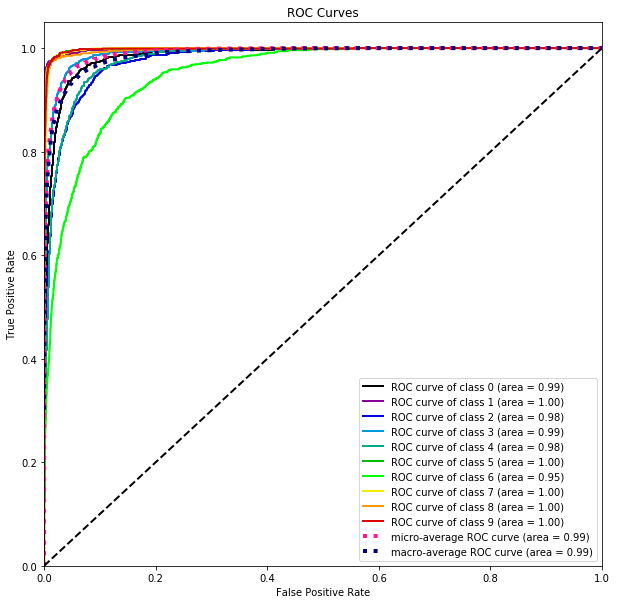

In [24]:
skplt.metrics.plot_roc(y_test, model_2lay.predict_proba(test_set),figsize = (10,10))
plt.show()

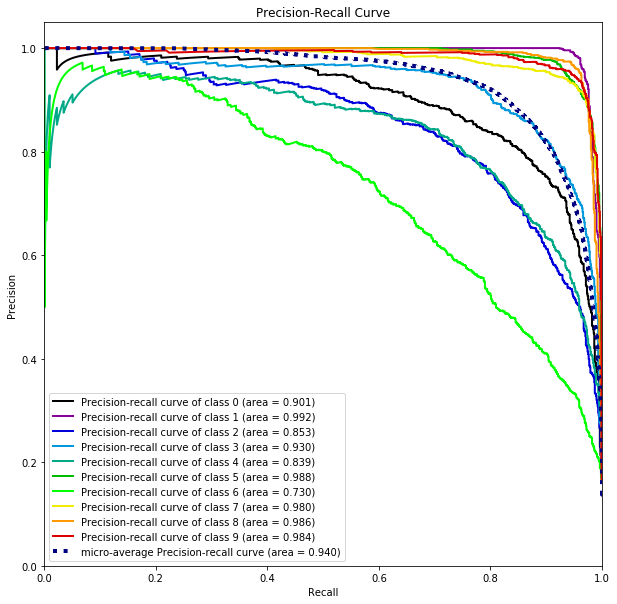

In [25]:
skplt.metrics.plot_precision_recall(y_test, model_2lay.predict_proba(test_set), figsize = (10,10))

У модели оказались теже проблемы, что и у случайного леса, а именно классификация 6 и 4 класса
Справилась сеть примерно на 2% хуже случайного леса.

Попробуем увеличить колличество нейронов 

In [26]:
model_2lay_100 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_2lay_100.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2lay_100.fit(train_set, y_train, epochs = 100)

Epoch 1/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.4892 - acc: 0.8241
Epoch 2/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3632 - acc: 0.8667
Epoch 3/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.3283 - acc: 0.8793
Epoch 4/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.3063 - acc: 0.8852
Epoch 5/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2875 - acc: 0.8927
Epoch 6/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.2714 - acc: 0.8986
Epoch 7/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2608 - acc: 0.9020
Epoch 8/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2510 - acc: 0.9050
Epoch 9/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2375 - acc: 0.9105
Epoch 10/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2318 - a

In [27]:
test_loss, test_acc = model_2lay_100.evaluate(test_set, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

#Точность на тестовых данных

10000/10000 [==============================] - 0s 48us/step
Test accuracy: 0.8876 
Test loss: 0.8299432512134306


Точность модели увеличилась примерно на 2.3% и превысила результат случайного леса

In [28]:
print("Classification report for classifier %s:\n%s\n"
      % (model_2lay_100, metrics.classification_report(y_test, model_2lay_100.predict_classes(test_set))))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002033B2B65F8>:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.79      0.80      1000
           3       0.90      0.87      0.89      1000
           4       0.78      0.84      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.71      0.70      0.71      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




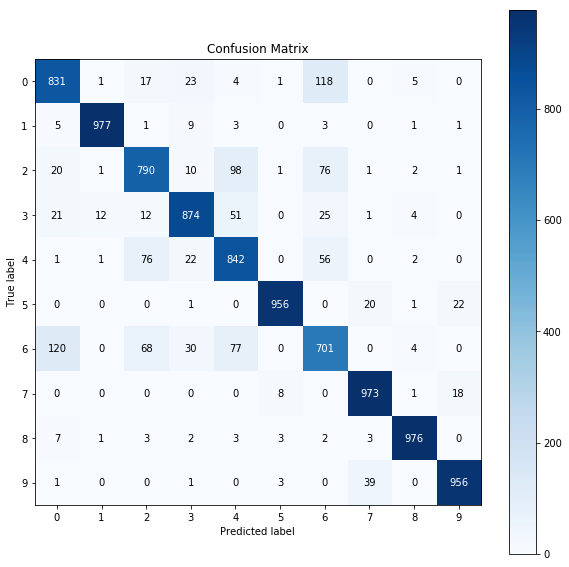

In [29]:
skplt.metrics.plot_confusion_matrix(y_test, model_2lay_100.predict_classes(test_set), figsize = (10,10))

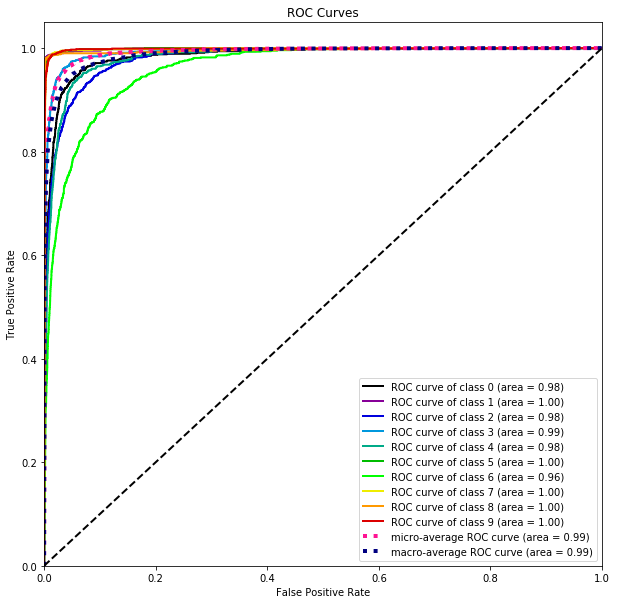

In [30]:
skplt.metrics.plot_roc(y_test, model_2lay_100.predict_proba(test_set),figsize = (10,10))
plt.show()

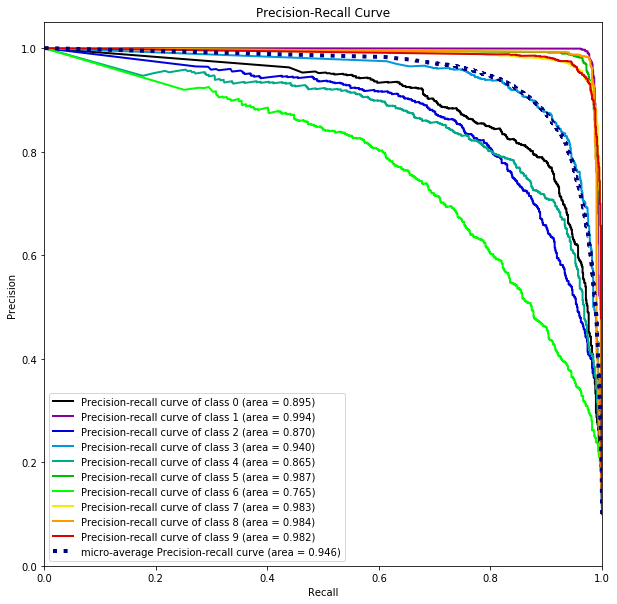

In [31]:
skplt.metrics.plot_precision_recall(y_test, model_2lay_100.predict_proba(test_set), figsize = (10,10))

Построим сеть с 3 скрытыми слоями

In [32]:
model_3lay = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_3lay.compile(optimizer='Adam', 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'],
                        )
model_3lay.fit(train_set, y_train, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 7s 114us/step - loss: 0.4867 - acc: 0.8226
Epoch 2/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.3686 - acc: 0.8644
Epoch 3/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.3302 - acc: 0.8785
Epoch 4/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.3072 - acc: 0.8864
Epoch 5/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.2907 - acc: 0.8918
Epoch 6/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.2768 - acc: 0.8966
Epoch 7/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.2621 - acc: 0.9021
Epoch 8/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.2530 - acc: 0.9041
Epoch 9/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.2418 - acc: 0.9080
Epoch 10/100
60000/60000 [==============================] - 6s 101us/step - loss: 0

In [33]:
test_loss, test_acc = model_3lay.evaluate(test_set, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

#Точность на тестовых данных

10000/10000 [==============================] - 1s 53us/step
Test accuracy: 0.8841 
Test loss: 0.8603940850207582


Точность модели колеблется в районе 0.88-0.89, такой же результат и у сети с двумя скрытыми слоями, третий слой только усложняет модель и увеличивает время обучения. Дальнейшее исследование будет проводиться на сети с двумя скрытыми слоями.

Попробуем различные функции активации

Возьмем elu как функцию активации в скрытых слоях вместо Relu

In [35]:
model_2lay_100_elu = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation=tf.nn.elu),
    keras.layers.Dense(200, activation=tf.nn.elu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_2lay_100_elu.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2lay_100_elu.fit(train_set, y_train, epochs = 100)

Epoch 1/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.4830 - acc: 0.8236
Epoch 2/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.3730 - acc: 0.8628
Epoch 3/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.3369 - acc: 0.8756
Epoch 4/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.3135 - acc: 0.8826
Epoch 5/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2942 - acc: 0.8894
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2782 - acc: 0.8966
Epoch 7/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.2652 - acc: 0.8999
Epoch 8/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2520 - acc: 0.9044
Epoch 9/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2442 - acc: 0.9077
Epoch 10/100
60000/60000 [==============================] - 6s 92us/step - loss: 0.2322 - a

In [36]:
test_loss, test_acc = model_2lay_100_elu.evaluate(test_set, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

#Точность на тестовых данных

10000/10000 [==============================] - 1s 53us/step
Test accuracy: 0.8909 
Test loss: 0.8878558331841603


Точность модели увеличилась примерно на 0.3%, из чего можно сделать вывод, что полное блокирование нейронов со значением <0 ухудшает качество модели. Экспоненциальная функция замедлила скорость обучения модели, поэтому попробуем использовать Leaky Relu

In [37]:
model_2lay_100_Lrelu = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation=tf.nn.leaky_relu),
    keras.layers.Dense(200, activation=tf.nn.leaky_relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_2lay_100_Lrelu.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2lay_100_Lrelu.fit(train_set, y_train, epochs = 100)

Epoch 1/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.4858 - acc: 0.8263
Epoch 2/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.3723 - acc: 0.8640
Epoch 3/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.3396 - acc: 0.8739
Epoch 4/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.3162 - acc: 0.8822
Epoch 5/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.3013 - acc: 0.8888
Epoch 6/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2889 - acc: 0.8915
Epoch 7/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2749 - acc: 0.8974
Epoch 8/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.2657 - acc: 0.9003
Epoch 9/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2565 - acc: 0.9035
Epoch 10/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2489 - 

In [38]:
test_loss, test_acc = model_2lay_100_Lrelu.evaluate(test_set, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

#Точность на тестовых данных

10000/10000 [==============================] - 1s 57us/step
Test accuracy: 0.8911 
Test loss: 0.7083907600900158


На тестовых данных модель показала себя также, как и предыдущая, ожидаемого ускорения обучения не произошло, поэтому остановимся на функции активации elu, как лучшей

In [42]:
model_2lay_100_elu_sig = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation=tf.nn.elu),
    keras.layers.Dense(200, activation=tf.nn.elu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

model_2lay_100_elu_sig.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2lay_100_elu_sig.fit(train_set, y_train, epochs = 100)

Epoch 1/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.5016 - acc: 0.8208
Epoch 2/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.3795 - acc: 0.8612
Epoch 3/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.3404 - acc: 0.8723
Epoch 4/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.3175 - acc: 0.8809
Epoch 5/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2991 - acc: 0.8875
Epoch 6/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.2808 - acc: 0.8931
Epoch 7/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.2669 - acc: 0.8982
Epoch 8/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2542 - acc: 0.9042
Epoch 9/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.2431 - acc: 0.9063
Epoch 10/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.2322 - 

In [43]:
test_loss, test_acc = model_2lay_100_elu_sig.evaluate(test_set, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

#Точность на тестовых данных

10000/10000 [==============================] - 1s 59us/step
Test accuracy: 0.89 
Test loss: 0.7619627139154792


In [ ]:
sigmoid в качестве функции активации выходного слоя оказался немногим хуже softmax

Оставшиеся тесты просто опишу:
Были проведены тесты с L1 и L2 регуляризациями, от чего качество модели только пострадало.
Линейные функции активации в скрытых слоях оказались хуже relu, leak_relu и elu
Увеличение кол-ва нейронов на скрытых слоях увеличивает качество модели, но с точки зрения затрат времени и качества 100 в первом слое и 200 во втором можно назвать оптимальным выбором.
Среди функций потерь sparse_categorical_crossentropy показала себя лучше всех остальных

Добавим сверточный и пулинг слои

In [10]:
train_set = train_set.reshape(len(train_set), 28,28,1)
test_set = test_set.reshape(len(test_set), 28,28,1)

#Изменяем размерность для свертки

In [1]:
model_Conv_pul = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), input_shape=(28, 28, 1), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dense(100, activation=tf.nn.elu),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model_Conv_pul.compile(optimizer='Adam', 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'],
                        )
model_Conv_pul.fit(train_set, y_train, epochs=10)

# Функция активации relu по сравнению с elu на сверточном слое заметно увеличивает как точность, так и скорость обучения
# 10 эпох потому, что очень долго и можно наблюдать высокую точность на первой же эпохе
# 2 скрытых слоя сильно замедляли скорость обучения и не сильно влияли на точность, поэтому оставил 1 со 100 нейронами,
# чтобы модель оставалась полносвзяной

NameError: name 'keras' is not defined

In [18]:
test_loss, test_acc = model_Conv_pul.evaluate(test_set, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

#Точность на тестовых данных

10000/10000 [==============================] - 11s 1ms/step
Test accuracy: 0.9049 
Test loss: 0.3036605026841164


In [13]:
print("Classification report for classifier %s:\n%s\n"
      % (model_Conv_pul, metrics.classification_report(y_test, model_Conv_pul.predict_classes(test_set))))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001E69585FCF8>:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.89      0.85      1000
           3       0.92      0.88      0.90      1000
           4       0.86      0.87      0.86      1000
           5       0.99      0.95      0.97      1000
           6       0.78      0.70      0.74      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.92      0.98      0.95      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000




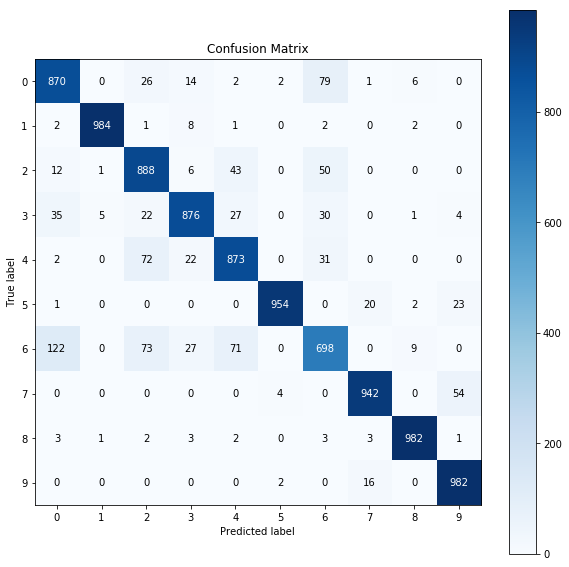

In [14]:
skplt.metrics.plot_confusion_matrix(y_test, model_Conv_pul.predict_classes(test_set), figsize = (10,10))

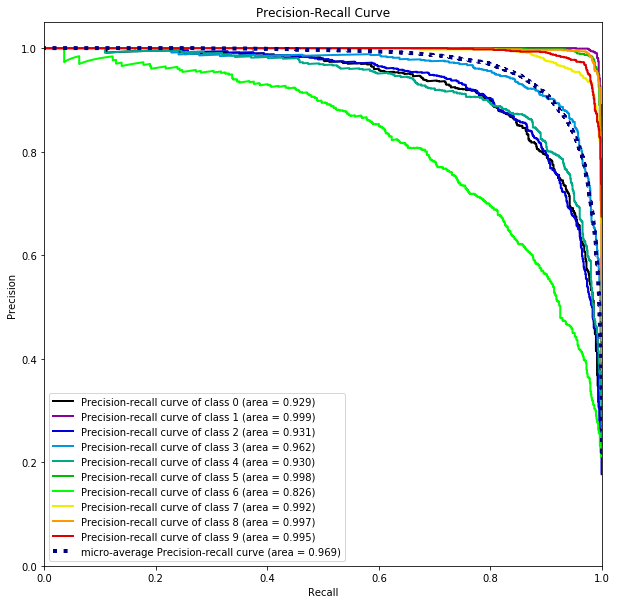

In [15]:
skplt.metrics.plot_precision_recall(y_test, model_Conv_pul.predict_proba(test_set), figsize = (10,10))

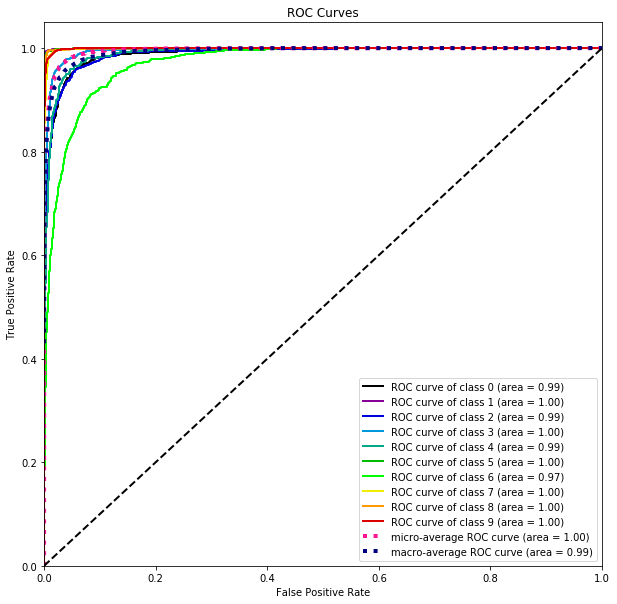

In [16]:
skplt.metrics.plot_roc(y_test, model_Conv_pul.predict_proba(test_set),figsize = (10,10))

Из confusion matrix видно, что классы 0, 2, 3, 4, 6 чаще всего путаются между собой, это было выявлено еще при анализе случайного леса, именно эти классы хуже всего распознаются. В особенности 6-ой